In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("merged_data.csv")


In [5]:
df

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
4035462,-23.0,-59.0,13.0,0.807457,76.60,34.21,7E,2020-10-31 15:13:27.000000000,2.0
4035463,-23.0,-59.0,14.0,0.807457,76.60,34.21,7E,2020-10-31 15:13:27.031249920,2.0
4035464,-23.0,-59.0,15.0,0.807457,76.60,34.21,7E,2020-10-31 15:13:27.062500096,2.0
4035465,-23.0,-59.0,15.0,0.807457,76.60,34.21,7E,2020-10-31 15:13:27.093750016,2.0


In [6]:
df.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       1
dtype: int64

In [7]:
df.dropna(inplace=True)

train


X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

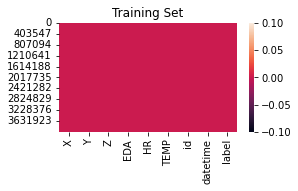

In [8]:
print('train')
display(df.isnull().sum())

plt.figure(figsize = (4, 2))
plt.title("Training Set")
sns.heatmap(df.isnull())
plt.show()

In [9]:
print('train')
display(df.info())

train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4035466 entries, 0 to 4035465
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 307.9+ MB


None

In [10]:
df= df.drop(columns=['id'],axis=1)

In [11]:
df

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...
4035461,-22.0,-58.0,13.0,0.798488,76.82,34.23,2020-10-31 15:13:26.968750080,2.0
4035462,-23.0,-59.0,13.0,0.807457,76.60,34.21,2020-10-31 15:13:27.000000000,2.0
4035463,-23.0,-59.0,14.0,0.807457,76.60,34.21,2020-10-31 15:13:27.031249920,2.0
4035464,-23.0,-59.0,15.0,0.807457,76.60,34.21,2020-10-31 15:13:27.062500096,2.0


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['datetime'] = le.fit_transform(df['datetime'])
display(df)

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2915215,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2915216,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2915217,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2915218,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2915219,2.0
...,...,...,...,...,...,...,...,...
4035461,-22.0,-58.0,13.0,0.798488,76.82,34.23,3822333,2.0
4035462,-23.0,-59.0,13.0,0.807457,76.60,34.21,3822334,2.0
4035463,-23.0,-59.0,14.0,0.807457,76.60,34.21,3822335,2.0
4035464,-23.0,-59.0,15.0,0.807457,76.60,34.21,3822336,2.0


In [13]:
print("X")
print("Skewness: %f" % df['X'].skew())
print("Kurtosis: %f" % df['X'].kurt())
print("X")
print("Skewness: %f" % df['Y'].skew())
print("Kurtosis: %f" % df['Y'].kurt())
print("Z")
print("Skewness: %f" % df['Z'].skew())
print("Kurtosis: %f" % df['Z'].kurt())
print("EDA")
print("Skewness: %f" % df['EDA'].skew())
print("Kurtosis: %f" % df['EDA'].kurt())
print("HR")
print("Skewness: %f" % df['HR'].skew())
print("Kurtosis: %f" % df['HR'].kurt())
print("TEMP")
print("Skewness: %f" % df['TEMP'].skew())
print("Kurtosis: %f" % df['TEMP'].kurt())
print("datetime")
print("Skewness: %f" % df['datetime'].skew())
print("Kurtosis: %f" % df['datetime'].kurt())

X
Skewness: 0.774746
Kurtosis: 0.857301
X
Skewness: -0.226531
Kurtosis: -0.016969
Z
Skewness: -0.086029
Kurtosis: 0.781010
EDA
Skewness: 3.307402
Kurtosis: 13.021465
HR
Skewness: 0.913654
Kurtosis: 1.591764
TEMP
Skewness: 0.118809
Kurtosis: -0.940357
datetime
Skewness: 0.080314
Kurtosis: -1.190619


In [14]:
print("EDA Original value")
print("Skewness: %f" % df['EDA'].skew())
print("Kurtosis: %f" % df['EDA'].kurt())

print("EDA Adjusted value")
df['EDA'] = df['EDA']**(1/3)
print('skewness:%f'%stats.skew(df['EDA'], bias = False))
print('kurtosis:%f'%stats.kurtosis(df['EDA'], bias = False, fisher=True))

EDA Original value
Skewness: 3.307402
Kurtosis: 13.021465
EDA Adjusted value
skewness:1.027770
kurtosis:0.818052


# Feature Selection

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1597
[LightGBM] [Info] Number of data points in the train set: 4035466, number of used features: 7
[LightGBM] [Info] Start training from score -1.358973
[LightGBM] [Info] Start training from score -1.774624
[LightGBM] [Info] Start training from score -0.555948
LGBMClassifi: 
 [  96  188  217 1272  602 1958 4667]


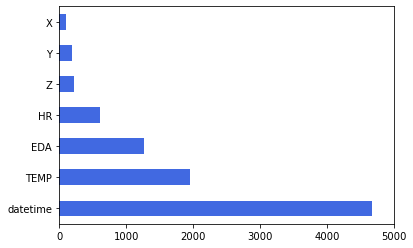

In [15]:
X_data_feature= df.drop(columns=['label'],axis=1)
y_data_feature= df['label']

model = [LGBMClassifier()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(7).plot(kind='barh', color='royalblue')
    plt.xlim(0, 5000)
    plt.show()

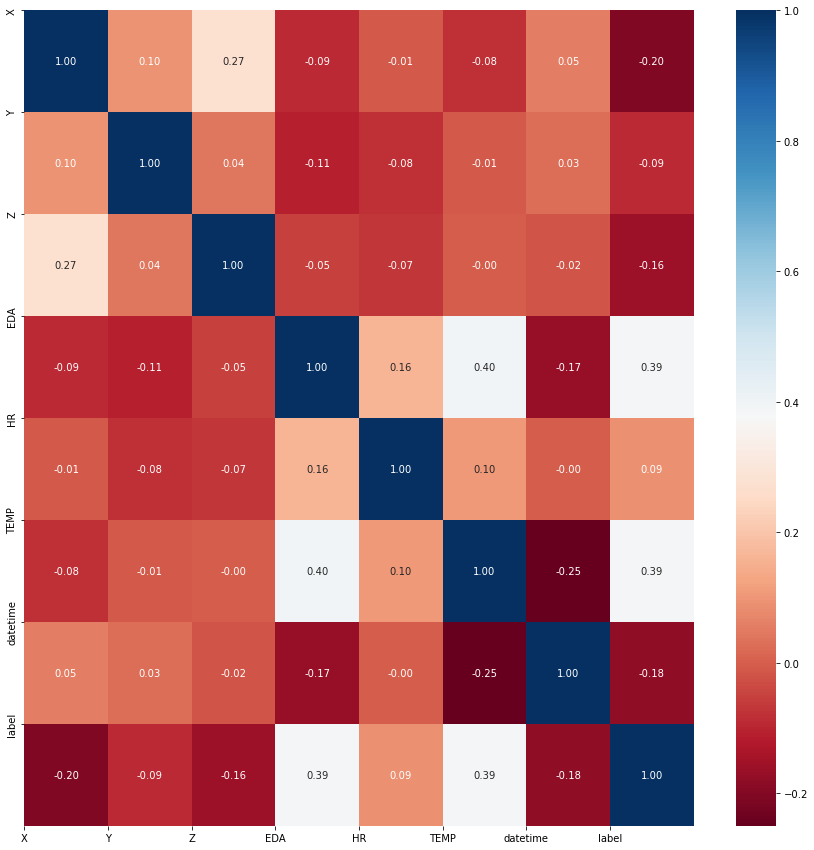

In [16]:
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [17]:
X= df.drop(columns=['label','datetime'],axis=1)
y= df['label']

In [18]:
from sklearn.preprocessing import MinMaxScaler

X_train=X
y_train=y

MinMaxScaler = MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5
0,0.450980,0.262745,0.521569,0.533503,0.430489,0.5664
1,0.423529,0.231373,0.490196,0.533503,0.430489,0.5664
2,0.380392,0.196078,0.443137,0.533503,0.430489,0.5664
3,0.317647,0.247059,0.352941,0.533503,0.430489,0.5664
4,0.239216,0.278431,0.294118,0.533503,0.430489,0.5664
...,...,...,...,...,...,...
4035461,0.415686,0.274510,0.552941,0.261636,0.229511,0.8112
4035462,0.411765,0.270588,0.552941,0.262612,0.227556,0.8096
4035463,0.411765,0.270588,0.556863,0.262612,0.227556,0.8096
4035464,0.411765,0.270588,0.560784,0.262612,0.227556,0.8096


In [19]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (3228372, 6)
Shape of X_eval:  (807094, 6)
Shape of y_train:  (3228372,)
Shape of y_eval (807094,)


# PCA

In [20]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(n_components=6).fit(X_train)
exp = pca.explained_variance_ratio_
print(exp)

[0.3834829  0.17256869 0.13668816 0.12910305 0.1083818  0.0697754 ]


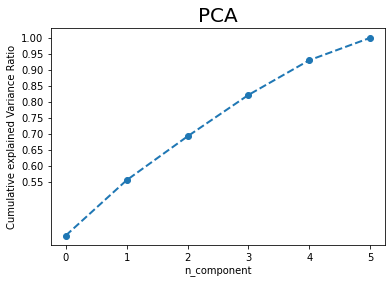

In [21]:
plt.plot(np.cumsum(exp), linewidth=2, marker = 'o', linestyle = '--')
plt.title("PCA", fontsize=20)
plt.xlabel('n_component')
plt.ylabel('Cumulative explained Variance Ratio')
plt.yticks(np.arange(0.55, 1.05, 0.05))
plt.show()


In [22]:
X_train_pca = IncrementalPCA(n_components=5).fit_transform(X_train)
X_eval_pca = IncrementalPCA(n_components=5).fit_transform(X_eval)

X_train=X_train_pca
X_eval=X_eval_pca

display(X_train)
display(X_eval)

array([[-0.24255313,  0.01720032, -0.05886821,  0.09125841,  0.16229942],
       [ 0.05691367,  0.03682247,  0.02823131,  0.06385561, -0.14729572],
       [ 0.21411058,  0.19858405,  0.20463723, -0.1846539 , -0.13109059],
       ...,
       [-0.14735833, -0.04263986, -0.11680478,  0.04772053, -0.02782695],
       [ 0.0486081 ,  0.45690568,  0.09668299,  0.02707541, -0.09787551],
       [-0.25792055,  0.01466561,  0.13828506, -0.05166411,  0.10654534]])

array([[ 0.05163534, -0.23102173, -0.02912978, -0.02993614, -0.01594207],
       [-0.01691102, -0.01389447, -0.07283812, -0.15548902, -0.05225669],
       [-0.26278393,  0.0223683 ,  0.07120812, -0.06313909, -0.00098668],
       ...,
       [-0.20917347, -0.04999203, -0.00410795,  0.07272744, -0.08781659],
       [ 0.21824064,  0.1202692 ,  0.12188801,  0.10659017, -0.0022577 ],
       [ 0.10345401, -0.15860532,  0.03101657, -0.1147501 , -0.0859524 ]])

In [23]:
print(X_train.shape)
print(X_eval.shape)

(3228372, 5)
(807094, 5)


In [24]:
LGBM = LGBMClassifier(objective='multiclass')
LGBM.fit(X_train, y_train)

XGB = XGBClassifier(objective='multi:softmax')
XGB.fit(X_train, y_train)

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

LR=LogisticRegression()
LR.fit(X_train,y_train)

DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 3228372, number of used features: 5
[LightGBM] [Info] Start training from score -1.359355
[LightGBM] [Info] Start training from score -1.774153
[LightGBM] [Info] Start training from score -0.555916


DecisionTreeClassifier()

LGBM accuracy is: 88.525%


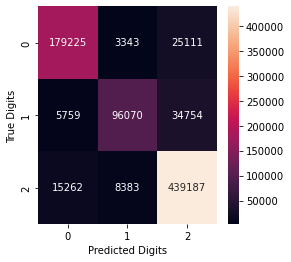

In [25]:
y_pred_LGBM = LGBM.predict(X_eval) 
LGBM_acc = accuracy_score(y_eval, y_pred_LGBM)
print("LGBM accuracy is: {0:.3f}%".format(LGBM_acc * 100))
cm = confusion_matrix(y_eval, y_pred_LGBM)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

XGB accuracy is: 91.237%


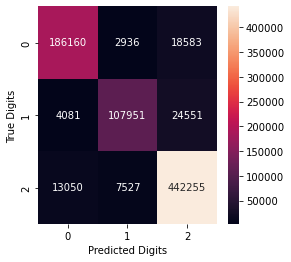

In [26]:
y_pred_XGB = XGB.predict(X_eval) 
XGB_acc = accuracy_score(y_eval, y_pred_XGB)
print("XGB accuracy is: {0:.3f}%".format(XGB_acc * 100))
cm = confusion_matrix(y_eval, y_pred_XGB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

XGB accuracy is: 98.120%


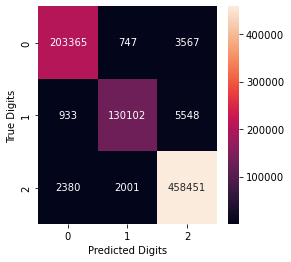

In [27]:
y_pred_RFC = RFC.predict(X_eval) 
RFC_acc = accuracy_score(y_eval, y_pred_RFC)
print("XGB accuracy is: {0:.3f}%".format(RFC_acc * 100))
cm = confusion_matrix(y_eval, y_pred_RFC)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

XGB accuracy is: 98.103%


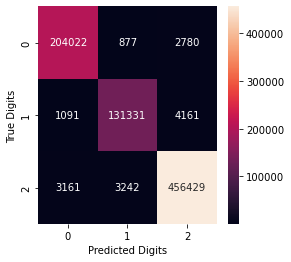

In [28]:
y_pred_KNN = KNN.predict(X_eval) 
KNN_acc = accuracy_score(y_eval, y_pred_KNN)
print("XGB accuracy is: {0:.3f}%".format(KNN_acc * 100))
cm = confusion_matrix(y_eval, y_pred_KNN)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

XGB accuracy is: 69.707%


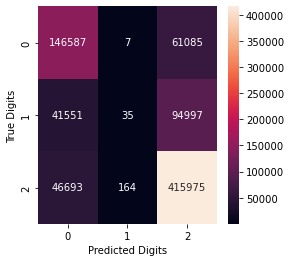

In [29]:
y_pred_LR = LR.predict(X_eval) 
LR_acc = accuracy_score(y_eval, y_pred_LR)
print("XGB accuracy is: {0:.3f}%".format(LR_acc * 100))
cm = confusion_matrix(y_eval, y_pred_LR)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

XGB accuracy is: 95.853%


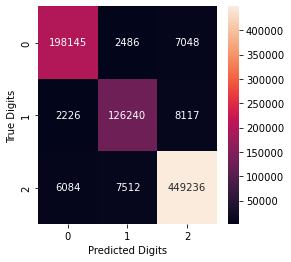

In [30]:
y_pred_DTC = DTC.predict(X_eval) 
DTC_acc = accuracy_score(y_eval, y_pred_DTC)
print("XGB accuracy is: {0:.3f}%".format(DTC_acc * 100))
cm = confusion_matrix(y_eval, y_pred_DTC)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [31]:
models = [('LGBMClassifier', LGBM_acc),
          ('XGBClassifier', XGB_acc),
          ('RandomForestClassifier',RFC_acc),
          ('KNeighborsClassifier',KNN_acc),
          ('DecisionTreeClassifier',DTC_acc),
          ('LogisticRegression',LR_acc)
         ]                                           

predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy'])
predict

,Model,Accuracy
0,LGBMClassifier,0.885253
1,XGBClassifier,0.912367
2,RandomForestClassifier,0.981197
3,KNeighborsClassifier,0.981028
4,DecisionTreeClassifier,0.958527
5,LogisticRegression,0.697065


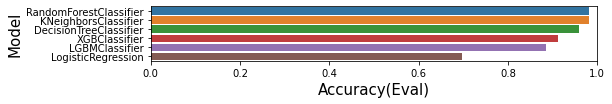

In [32]:
f, axe = plt.subplots(1,1, figsize=(8,1))

predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='Model',  data = predict, ax = axe)
axe.set_xlabel('Accuracy(Eval)', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,1.0)
plt.show()